In [1]:
import pandas as pd

In [2]:
filename = 'ca-500.csv'

df = pd.read_csv(filename)
df

,first_name,last_name,company_name,address,city,province,postal,phone1,phone2,email,web
0,Francoise,Rautenstrauch,"Riebesell, H F Jr",2335 Canton Hwy #6,Windsor,ON,N8N 3N2,519-569-8399,519-978-6179,francoise.rautenstrauch@rautenstrauch.com,http://www.riebesellhfjr.com
1,Kendra,Loud,Deloitte & Touche,6 Arch St #9757,Alcida,NB,E8J 2C4,506-363-1526,506-932-4472,kloud@gmail.com,http://www.deloittetouche.com
2,Lourdes,Bauswell,Oklahoma Neon Inc,9547 Belmont Rd #21,Belleville,ON,K8P 1B3,613-903-7043,613-638-6682,lourdes_bauswell@aol.com,http://www.oklahomaneoninc.com
3,Hannah,Edmison,M B A Paint Stores,73 Pittsford Victor Rd,Vancouver,BC,V5Z 3K2,604-334-3686,604-692-7694,hannah@yahoo.com,http://www.mbapaintstores.com
4,Tom,Loeza,Sheraton Shreveport Hotel,447 Commercial St Se,LIle-Perrot,QC,J7V 4T4,514-487-6096,514-727-4760,tom.loeza@gmail.com,http://www.sheratonshreveporthotel.com
...,...,...,...,...,...,...,...,...,...,...,...
495,Erin,Delbosque,Curtiss Wright Corp,357 W Mount Royal Ave,Longueuil,QC,J4M 2A8,450-316-7813,450-491-8703,erin@cox.net,http://www.curtisswrightcorp.com
496,Kassandra,Marushia,Phelps Tool & Die Co Inc,123 Euclid Ave #9396,Nanaimo,BC,V9R 1C9,250-646-6446,250-571-5058,kassandra@gmail.com,http://www.phelpstooldiecoinc.com
497,Leslee,Matsuno,Factory Mattress Outlet,1251 E Main St #990,Quebec,QC,G1H 1A6,418-460-5773,418-543-9015,leslee_matsuno@matsuno.org,http://www.factorymattressoutlet.com
498,Daniel,Dobler,Cosgroves N End Plbg & Hdwr Co,259 W 17th St #39,Beresford,NB,E8K 1B7,506-617-2607,506-951-8403,ddobler@dobler.com,http://www.cosgrovesnendplbghdwrco.com


## Exploratory Data Analysis

* Hoeveel rijen?
* Hoeveel kolommen?
* Data types
* Kolomnamen?
* Is er ontbrekende data? Lege cellen?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   first_name    500 non-null    object
 1   last_name     500 non-null    object
 2   company_name  500 non-null    object
 3   address       500 non-null    object
 4   city          500 non-null    object
 5   province      500 non-null    object
 6   postal        500 non-null    object
 7   phone1        500 non-null    object
 8   phone2        500 non-null    object
 9   email         500 non-null    object
 10  web           500 non-null    object
dtypes: object(11)
memory usage: 43.1+ KB


### Vragen
* Aantal unieke steden (city)
* Aantal unieke provincies (province)

In [10]:
df['city'].unique().size

227

In [11]:
df['province'].unique().size

10

In [15]:
provincies = list(df['province'].unique())

In [16]:
provincies

['ON', 'NB', 'BC', 'QC', 'SK', 'NS', 'AB', 'MB', 'NL', 'PE']

### Kolommen selecteren

Vragen:
* Selecteer first_name, last_name, city, email in een nieuwe dataframe
* Geef hiervan allen de rijen met mensen uit Montreal

In [28]:
df2 = df[['first_name', 'last_name', 'city', 'email']]

df2[df2['city']=='Montreal']

,first_name,last_name,city,email
67,Mammie,Cisney,Montreal,mammie@cox.net
109,Tesha,Brang,Montreal,tesha@aol.com
233,Harris,Sheck,Montreal,harris@cox.net
236,Maddie,Foulds,Montreal,maddie@hotmail.com
239,Steffanie,Meinen,Montreal,steffanie.meinen@cox.net
315,Val,Bigaud,Montreal,val_bigaud@aol.com
350,Denny,Zeanah,Montreal,denny_zeanah@zeanah.com
411,Luann,Michon,Montreal,luann@cox.net
422,Verona,Jobst,Montreal,verona_jobst@jobst.org
424,Rikki,Montalgo,Montreal,rikki@montalgo.com


In [41]:
df.loc[(df['city']=='Montreal') & (df['first_name'].str.match('.*a$')), 
       ['first_name', 'last_name', 'city', 'email']]

,first_name,last_name,city,email
109,Tesha,Brang,Montreal,tesha@aol.com
422,Verona,Jobst,Montreal,verona_jobst@jobst.org
483,Clemencia,Momplaisir,Montreal,cmomplaisir@yahoo.com


## Aantal mensen per city

In [44]:
df['city'].value_counts().head(10)

Calgary       19
Montreal      12
Etobicoke     11
Vancouver      9
Edmonton       9
Surrey         9
Regina         9
North York     9
Quebec         8
Winnipeg       7
Name: city, dtype: int64

<AxesSubplot:>

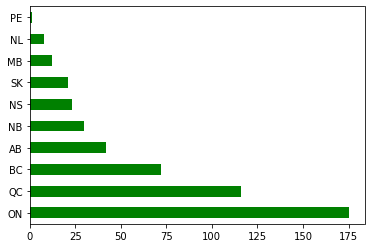

In [50]:
df['province'].value_counts().plot(kind='barh', color='green')

In [47]:
df['province'].value_counts()

ON    175
QC    116
BC     72
AB     42
NB     30
NS     23
SK     21
MB     12
NL      8
PE      1
Name: province, dtype: int64

In [52]:
df['province'].astype('category')

0      ON
1      NB
2      ON
3      BC
4      QC
       ..
495    QC
496    BC
497    QC
498    NB
499    BC
Name: province, Length: 500, dtype: category
Categories (10, object): ['AB', 'BC', 'MB', 'NB', ..., 'ON', 'PE', 'QC', 'SK']

In [54]:
df['first_name'].astype('string')

0      Francoise
1         Kendra
2        Lourdes
3         Hannah
4            Tom
         ...    
495         Erin
496    Kassandra
497       Leslee
498       Daniel
499      Antonio
Name: first_name, Length: 500, dtype: string

In [55]:
df

,first_name,last_name,company_name,address,city,province,postal,phone1,phone2,email,web
0,Francoise,Rautenstrauch,"Riebesell, H F Jr",2335 Canton Hwy #6,Windsor,ON,N8N 3N2,519-569-8399,519-978-6179,francoise.rautenstrauch@rautenstrauch.com,http://www.riebesellhfjr.com
1,Kendra,Loud,Deloitte & Touche,6 Arch St #9757,Alcida,NB,E8J 2C4,506-363-1526,506-932-4472,kloud@gmail.com,http://www.deloittetouche.com
2,Lourdes,Bauswell,Oklahoma Neon Inc,9547 Belmont Rd #21,Belleville,ON,K8P 1B3,613-903-7043,613-638-6682,lourdes_bauswell@aol.com,http://www.oklahomaneoninc.com
3,Hannah,Edmison,M B A Paint Stores,73 Pittsford Victor Rd,Vancouver,BC,V5Z 3K2,604-334-3686,604-692-7694,hannah@yahoo.com,http://www.mbapaintstores.com
4,Tom,Loeza,Sheraton Shreveport Hotel,447 Commercial St Se,LIle-Perrot,QC,J7V 4T4,514-487-6096,514-727-4760,tom.loeza@gmail.com,http://www.sheratonshreveporthotel.com
...,...,...,...,...,...,...,...,...,...,...,...
495,Erin,Delbosque,Curtiss Wright Corp,357 W Mount Royal Ave,Longueuil,QC,J4M 2A8,450-316-7813,450-491-8703,erin@cox.net,http://www.curtisswrightcorp.com
496,Kassandra,Marushia,Phelps Tool & Die Co Inc,123 Euclid Ave #9396,Nanaimo,BC,V9R 1C9,250-646-6446,250-571-5058,kassandra@gmail.com,http://www.phelpstooldiecoinc.com
497,Leslee,Matsuno,Factory Mattress Outlet,1251 E Main St #990,Quebec,QC,G1H 1A6,418-460-5773,418-543-9015,leslee_matsuno@matsuno.org,http://www.factorymattressoutlet.com
498,Daniel,Dobler,Cosgroves N End Plbg & Hdwr Co,259 W 17th St #39,Beresford,NB,E8K 1B7,506-617-2607,506-951-8403,ddobler@dobler.com,http://www.cosgrovesnendplbghdwrco.com


In [56]:
df.index

RangeIndex(start=0, stop=500, step=1)

In [57]:
df.columns

Index(['first_name', 'last_name', 'company_name', 'address', 'city',
       'province', 'postal', 'phone1', 'phone2', 'email', 'web'],
      dtype='object')

In [66]:
df.sort_values('last_name')

,first_name,last_name,company_name,address,city,province,postal,phone1,phone2,email,web
394,Louvenia,Abney,L M Mccown & Son Co,6 Friendship Dr #5055,Prince Albert,SK,S6V 6A4,306-256-9309,306-636-7201,louvenia_abney@hotmail.com,http://www.lmmccownsonco.com
150,Tuyet,Abramovitz,"Gibbard, H Frank Iii",976 Cozycroft Ave,Richmond Hill,ON,L4E 4P3,905-790-7938,905-876-7283,tuyet.abramovitz@abramovitz.com,http://www.gibbardhfrankiii.com
290,Olga,Adessa,"Weiss, Arnold M Cpa",8507 Upland St,Burlington,ON,L7P 4T1,905-775-6413,905-340-9290,oadessa@cox.net,http://www.weissarnoldmcpa.com
35,Renato,Airhart,Super 8 Motel,1 Vernon Blvd,Calgary,AB,T2A 2H9,403-444-2250,403-232-4114,renato_airhart@hotmail.com,http://www.supermotel.com
286,Dorothy,Aitken,"Mcmillon, Wendy A Esq",4 Hanover Pike,Mississauga,ON,L5V 1E5,905-554-3838,905-355-9556,dorothy.aitken@cox.net,http://www.mcmillonwendyaesq.com
...,...,...,...,...,...,...,...,...,...,...,...
435,Davida,Zeng,"Conway, John J Esq",8881 Hopkins St,Sainte-Sophie,QC,J5J 2B5,450-375-8192,450-274-3903,davida_zeng@yahoo.com,http://www.conwayjohnjesq.com
145,Carry,Ziller,Hatboro Delivery Service,8 Maynesboro St,Strathroy,ON,N7G 3H9,519-847-8783,519-902-8276,carry@cox.net,http://www.hatborodeliveryservice.com
285,Cordell,Zinda,"Kaye, Jeffrey A Esq",91 Argyle Rd,Sherbrooke,QC,J1H 6E3,819-508-6057,819-313-7350,cordell_zinda@cox.net,http://www.kayejeffreyaesq.com
418,Asha,Zoldak,Ducson Sportswear Inc,4 Gray Ave,Saint-Stanislas,QC,G8L 7B6,418-470-9730,418-997-7008,asha_zoldak@hotmail.com,http://www.ducsonsportswearinc.com
